## Обучение без учителя

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [6]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
y = pd.DataFrame(boston.target, columns=['PRICE'])
y.head(3)

,PRICE
0,24.0
1,21.6
2,34.7


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
tsne =TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

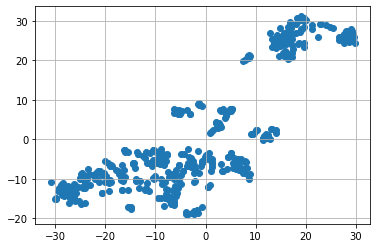

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid()
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

In [14]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [15]:
labels_train = kmeans.fit_predict(X_train_scaled)

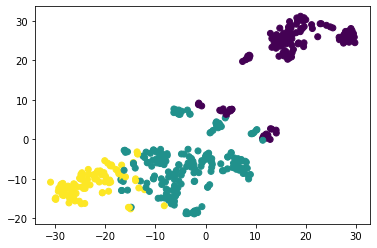

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [19]:
y_train[labels_train==0].mean()

PRICE    16.179688
dtype: float64

In [28]:
y_train[labels_train==1].mean()

PRICE    24.994737
dtype: float64

In [23]:
X_train['CRIM'][labels_train==0].mean()

10.715219062500003

In [34]:
X_train['CRIM'][labels_train==1].mean()

0.4221666842105262

In [37]:
X_train['CRIM'][labels_train==2].mean()

0.07356558139534886

#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [38]:
labels_train = kmeans.fit_predict(X_test_scaled)

In [40]:
y_test[labels_train==0].mean()

PRICE    33.871429
dtype: float64

In [41]:
y_test[labels_train==1].mean()

PRICE    16.437143
dtype: float64

In [42]:
y_test[labels_train==2].mean()

PRICE    21.55283
dtype: float64

In [44]:
X_test['CRIM'][labels_train==0].mean()

0.08618571428571427

In [45]:
X_test['CRIM'][labels_train==1].mean()

10.165531142857143

In [46]:
X_test['CRIM'][labels_train==2].mean()

0.25200716981132076